start 2022-08-04 10:47:59.151044
/data/keeling/a/yulanh/mydata/OT_modis/plot_output/hc_record_information_gpm_modis_1505_update_2018.txt
852
/data/keeling/a/yulanh/mydata/OT_modis/plot_output/hc_record_information_gpm_modis_1505_update_2019.txt
974
/data/keeling/a/yulanh/mydata/OT_modis/plot_output/hc_record_information_gpm_modis_1505_update_2020.txt
1191


/tmp/ipykernel_54630/429720664.py:246: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(bottom=0.26, top=0.9, left=0.01, right=0.95,


finish 2022-08-04 10:48:05.441846


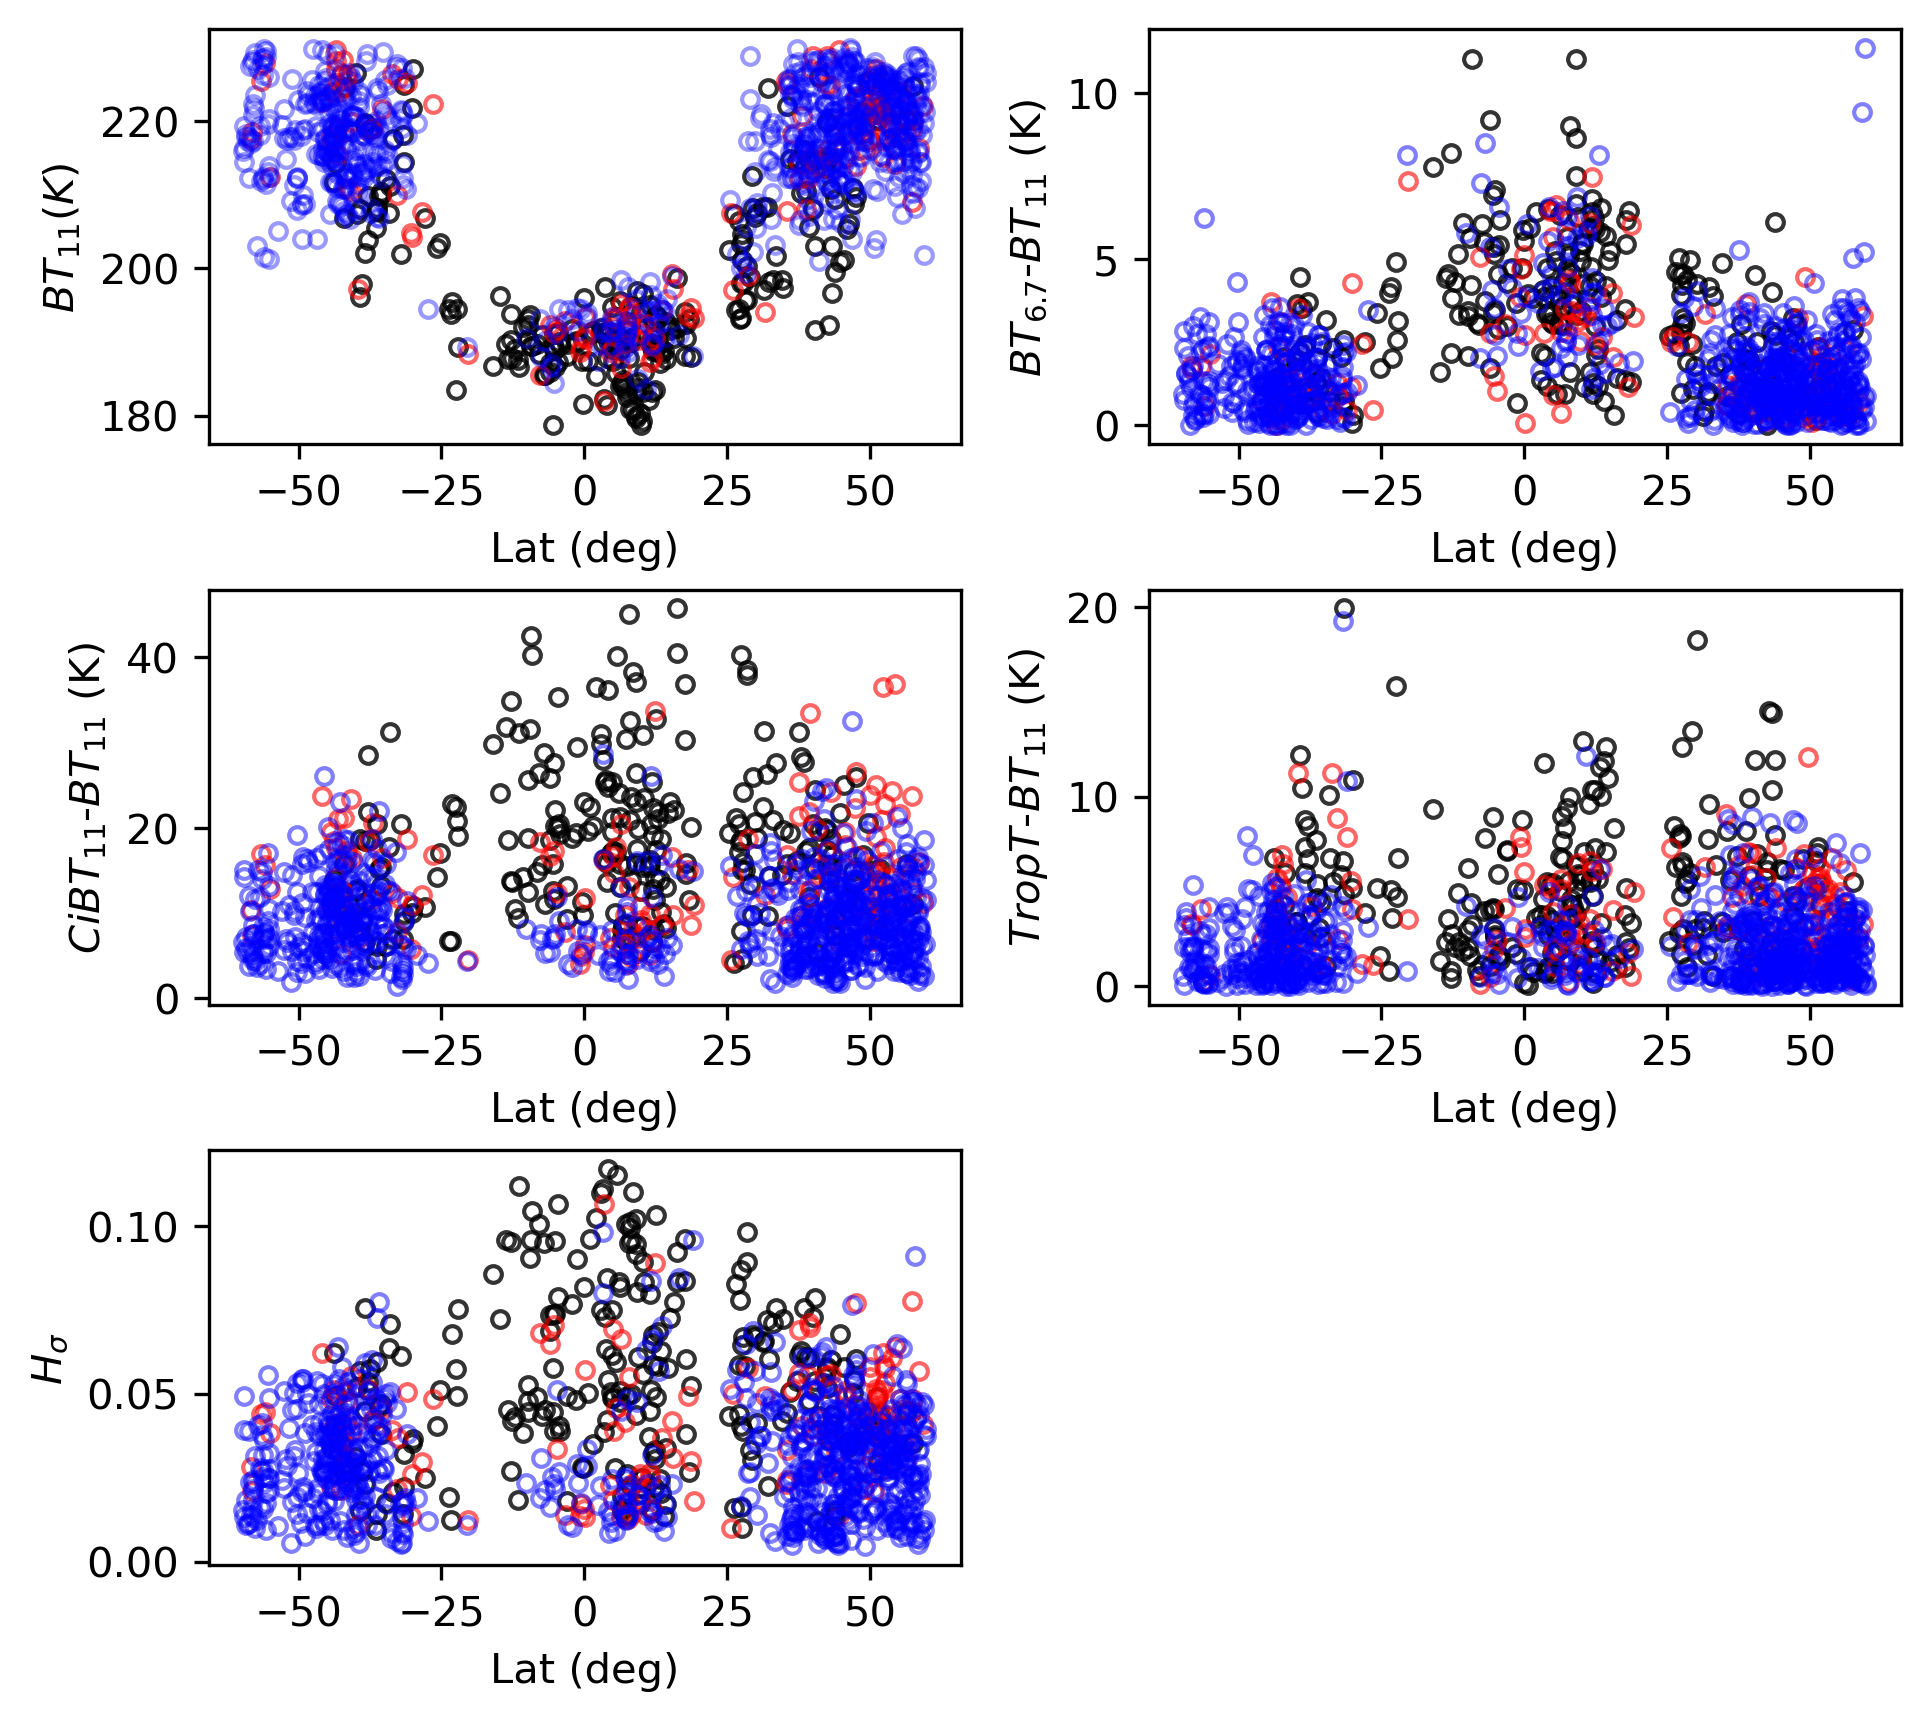

In [1]:
# this script is to plot OT properties with P > 0.9, and compare with those mannual check

def read_text(fname):
    fo=open(fname,'r') #create file object
    #headstr=fo.readline()
    data=fo.readlines()
    #print (data)
    fo.close()  # close object
    return data

import os 
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime, date, timedelta
import numpy as np
import pandas as pd
import glob
from pyhdf.SD import SD, SDC
import h5py
import statsmodels.api as sm
from scipy import stats
from math import floor
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
#check for land-sea mask
from global_land_mask import globe


print('start',datetime.now())
fnames=glob.glob('/data/keeling/a/yulanh/mydata/OT_modis/plot_output/hc_record_information_gpm_modis_1505_update_20*')

Alllat_OT=np.zeros((1),'f')
All_aveBT11_OT=np.zeros((1),'f')
All_aveBT67_OT=np.zeros((1),'f')
All_minBT11_OT=np.zeros((1),'f')
All_minBT67_OT=np.zeros((1),'f')
All_trop_T_OT=np.zeros((1),'f')
All_hetero_OT=np.zeros((1),'f')
All_aveCiBT_OT=np.zeros((1),'f')

Alllat_NOT=np.zeros((1),'f')
All_aveBT11_NOT=np.zeros((1),'f')
All_aveBT67_NOT=np.zeros((1),'f')
All_minBT11_NOT=np.zeros((1),'f')
All_minBT67_NOT=np.zeros((1),'f')
All_trop_T_NOT=np.zeros((1),'f')
All_hetero_NOT=np.zeros((1),'f')
All_aveCiBT_NOT=np.zeros((1),'f')

Alllat_LOT=np.zeros((1),'f')
All_aveBT11_LOT=np.zeros((1),'f')
All_aveBT67_LOT=np.zeros((1),'f')
All_minBT11_LOT=np.zeros((1),'f')
All_minBT67_LOT=np.zeros((1),'f')
All_trop_T_LOT=np.zeros((1),'f')
All_hetero_LOT=np.zeros((1),'f')
All_aveCiBT_LOT=np.zeros((1),'f')

for fname in fnames:
    print(fname)
    data=read_text(fname)
    splitcol=data[0].split(' ')
    Ncol=len(splitcol)-splitcol.count('')
    Nrow=len(data)
    #rint(Ncol,Nrow)

    dataT=np.zeros((Nrow,Ncol-1),'f')

    colocated_fname = np.chararray(Nrow,itemsize=99)

    for i in range(Nrow):
        splitcol=data[i].split(' ')
        k=0
        for j in range(len(splitcol)):
            if (len(splitcol[j]) == 99):
                colocated_fname[i]=splitcol[j]
            
            if len(splitcol[j]) != 0 and splitcol[j] !='\n' and len(splitcol[j]) != 99:
                dataT[i,k]=float(splitcol[j])
                k=k+1
        

    GOTlon=dataT[:,0]
    GOTlat=dataT[:,1]
    OTflag=dataT[:,6] # a flag that from mannually check 0-NOT, 1-OT, 3-night time, 2-likely OT
    Proba =dataT[:,2]
    
    Totnum=GOTlon.shape
    Totnum=Totnum[0]
    print(Totnum)

    for fi in range(Totnum):

    # read the spatial data
        tpfname=colocated_fname[fi]
        #print(tpfname)
        data=read_text(tpfname)
        splitcol=data[0].split(' ')
        MODNcol=len(splitcol)-splitcol.count('')
        MODNrow=len(data)
        #print(MODNcol,MODNrow)
        # transfer data from string to float
        dataT=np.zeros((MODNrow,MODNcol),'f') 
        for i in range(MODNrow):
            splitcol=data[i].split(' ')
            #print(splitcol)
            k=0
            for j in range(len(splitcol)):
                if splitcol[j] != '' and splitcol[j] != '\n' :
                    dataT[i,k]=float(splitcol[j])
                    k=k+1
                
        MODlon=dataT[:,12] # modis lon&lat
        MODlat=dataT[:,13]
        MODprob=dataT[:,14]
        MODCBT11=dataT[:,16] # center
        MODaBT11=dataT[:,17] #average
        MODCBT67=dataT[:,18]
        MODaBT67=dataT[:,19]
        tropopause_T=dataT[:,20]
        MODciaBT=dataT[:,21] #ci ave BT
        MODciBT=dataT[:,22:30]
        OTedge = dataT[:,30:38]
        OTstd  =dataT[:,38]
        Cistd  =dataT[:,39]
        OTCistd  =dataT[:,40]
        
        
         #obtain the information of OT
        ind=np.where((GOTlon[fi] == MODlon) & (GOTlat[fi] == MODlat) & (Proba[fi] == MODprob))
        ind=ind[0]
        #print(tpfname,MODlon,ind,GOTlon[fi])
        tpciavebt=MODciaBT[ind]
        tpotavebt11=MODaBT11[ind]
        tpotminbt11=MODCBT11[ind]
        tpotavebt67=MODaBT67[ind]
        tpotminbt67=MODCBT67[ind]
        tptrop_T = tropopause_T[ind]
        tpciavebt11= MODciaBT[ind]
        
    
        tpotcistd=OTCistd[ind]
        #hetero_OT[fi]=tpotstd/tpotavebt
        #hetero_Ci[fi]=tpcistd/tpciavebt
        tphetero_OTCi=2*tpotcistd/(tpciavebt+tpotavebt11)
        # add information to array
        #print(OTflag[fi])
        if (OTflag[fi] == 1):
            Alllat_OT=np.append(Alllat_OT,GOTlat[fi])
            All_aveBT11_OT=np.append(All_aveBT11_OT,tpotavebt11)
            All_aveBT67_OT=np.append(All_aveBT67_OT,tpotavebt67)
            All_minBT11_OT=np.append(All_minBT11_OT,tpotminbt11)
            All_minBT67_OT=np.append(All_minBT67_OT,tpotminbt67)
            All_trop_T_OT=np.append(All_trop_T_OT,tptrop_T)
            All_hetero_OT=np.append(All_hetero_OT,tphetero_OTCi)
            All_aveCiBT_OT=np.append(All_aveCiBT_OT,tpciavebt11)

        if (OTflag[fi] == 0):
            Alllat_NOT=np.append(Alllat_NOT,GOTlat[fi])
            All_aveBT11_NOT=np.append(All_aveBT11_NOT,tpotavebt11)
            All_aveBT67_NOT=np.append(All_aveBT67_NOT,tpotavebt67)
            All_minBT11_NOT=np.append(All_minBT11_NOT,tpotminbt11)
            All_minBT67_NOT=np.append(All_minBT67_NOT,tpotminbt67)
            All_trop_T_NOT=np.append(All_trop_T_NOT,tptrop_T)
            All_hetero_NOT=np.append(All_hetero_NOT,tphetero_OTCi)
            All_aveCiBT_NOT=np.append(All_aveCiBT_NOT,tpciavebt11)
            
        if (OTflag[fi] == 2):
            Alllat_LOT=np.append(Alllat_LOT,GOTlat[fi])
            All_aveBT11_LOT=np.append( All_aveBT11_LOT,tpotavebt11)
            All_aveBT67_LOT=np.append( All_aveBT67_LOT,tpotavebt67)
            All_minBT11_LOT=np.append(All_minBT11_LOT,tpotminbt11)
            All_minBT67_LOT=np.append(All_minBT67_LOT,tpotminbt67)
            All_trop_T_LOT=np.append(All_trop_T_LOT,tptrop_T)
            All_hetero_LOT=np.append(All_hetero_LOT,tphetero_OTCi)    
            All_aveCiBT_LOT=np.append(All_aveCiBT_LOT,tpciavebt11)
            
LOT_num=Alllat_LOT.shape[0]
Alllat_LOT=Alllat_LOT[1:LOT_num]
All_aveBT11_LOT=All_aveBT11_LOT[1:LOT_num]
All_aveBT67_LOT=All_aveBT67_LOT[1:LOT_num]
All_minBT11_LOT=All_minBT11_LOT[1:LOT_num]
All_minBT67_LOT=All_minBT67_LOT[1:LOT_num]
All_trop_T_LOT=All_trop_T_LOT[1:LOT_num]
All_hetero_LOT=All_hetero_LOT[1:LOT_num]
All_aveCiBT_LOT= All_aveCiBT_LOT[1:LOT_num]

OT_num=Alllat_OT.shape[0]
Alllat_OT=Alllat_OT[1:OT_num]
All_aveBT11_OT=All_aveBT11_OT[1:OT_num]
All_aveBT67_OT=All_aveBT67_OT[1:OT_num]
All_minBT11_OT=All_minBT11_OT[1:OT_num]
All_minBT67_OT=All_minBT67_OT[1:OT_num]
All_trop_T_OT=All_trop_T_OT[1:OT_num]
All_hetero_OT=All_hetero_OT[1:OT_num]
All_aveCiBT_OT= All_aveCiBT_OT[1:OT_num]

NOT_num=Alllat_NOT.shape[0]
Alllat_NOT=Alllat_NOT[1:NOT_num]
All_aveBT11_NOT=All_aveBT11_NOT[1:NOT_num]
All_aveBT67_NOT=All_aveBT67_NOT[1:NOT_num]
All_minBT11_NOT=All_minBT11_NOT[1:NOT_num]
All_minBT67_NOT=All_minBT67_NOT[1:NOT_num]
All_trop_T_NOT=All_trop_T_NOT[1:NOT_num]
All_hetero_NOT=All_hetero_NOT[1:NOT_num]
All_aveCiBT_NOT= All_aveCiBT_NOT[1:NOT_num]

#plt.fill_between(x, (y-ci), (y+ci), color='blue', alpha=0.1) 

fig, ax =plt.subplots(3,2,figsize=[6,8],dpi=300,constrained_layout=True)

p00=ax[0,0].plot(Alllat_OT,All_minBT11_OT,'black',linestyle='',marker='o',markersize=4,mfc='none',alpha=0.8)
p01=ax[0,0].plot(Alllat_LOT,All_minBT11_LOT,'red',linestyle='',marker='o',markersize=4,mfc='none',alpha=0.6)
p02=ax[0,0].plot(Alllat_NOT,All_minBT11_NOT,'blue',linestyle='',marker='o',markersize=4,mfc='none',alpha=0.4)
#ax[0,0].set_title('$BT_{11}$')
ax[0,0].set_ylabel('$BT_{11} (K)$')
ax[0,0].set_xlabel('Lat (deg)')

p00=ax[0,1].plot(Alllat_OT,All_aveBT67_OT-All_aveBT11_OT,'black',linestyle='',marker='o',markersize=4,mfc='none',alpha=0.8)
p01=ax[0,1].plot(Alllat_LOT,All_aveBT67_LOT-All_aveBT11_LOT,'red',linestyle='',marker='o',markersize=4,mfc='none',alpha=0.6)
p02=ax[0,1].plot(Alllat_NOT,All_aveBT67_NOT-All_aveBT11_NOT,'blue',linestyle='',marker='o',markersize=4,mfc='none',alpha=0.5)
#ax[0,0].set_title('$BT_{11}$')
ax[0,1].set_ylabel('$BT_{6.7}$-$BT_{11}$ (K)')
ax[0,1].set_xlabel('Lat (deg)')

p00=ax[1,0].plot(Alllat_OT,All_aveCiBT_OT-All_minBT11_OT,'black',linestyle='',marker='o',markersize=4,mfc='none',alpha=0.8)
p01=ax[1,0].plot(Alllat_LOT,All_aveCiBT_LOT-All_minBT11_LOT,'red',linestyle='',marker='o',markersize=4,mfc='none',alpha=0.6)
p02=ax[1,0].plot(Alllat_NOT,All_aveCiBT_NOT-All_minBT11_NOT,'blue',linestyle='',marker='o',markersize=4,mfc='none',alpha=0.5)
#ax[0,0].set_title('$BT_{11}$')
ax[1,0].set_ylabel('$Ci BT_{11}$-$BT_{11}$ (K)')
ax[1,0].set_xlabel('Lat (deg)')

p00=ax[1,1].plot(Alllat_OT,All_trop_T_OT-All_minBT11_OT,'black',linestyle='',marker='o',markersize=4,mfc='none',alpha=0.8)
p01=ax[1,1].plot(Alllat_LOT,All_trop_T_LOT-All_minBT11_LOT,'red',linestyle='',marker='o',markersize=4,mfc='none',alpha=0.6)
p02=ax[1,1].plot(Alllat_NOT,All_trop_T_NOT-All_minBT11_NOT,'blue',linestyle='',marker='o',markersize=4,mfc='none',alpha=0.5)
#ax[0,0].set_title('$BT_{11}$')
ax[1,1].set_ylabel('$Trop T$-$BT_{11}$ (K)')
ax[1,1].set_xlabel('Lat (deg)')

p00=ax[2,0].plot(Alllat_OT,All_hetero_OT,'black',linestyle='',marker='o',markersize=4,mfc='none',alpha=0.8)
p01=ax[2,0].plot(Alllat_LOT,All_hetero_LOT,'red',linestyle='',marker='o',markersize=4,mfc='none',alpha=0.6)
p02=ax[2,0].plot(Alllat_NOT,All_hetero_NOT,'blue',linestyle='',marker='o',markersize=4,mfc='none',alpha=0.5)
#ax[0,0].set_title('$BT_{11}$')
ax[2,0].set_ylabel('$H_\sigma$')
ax[2,0].set_xlabel('Lat (deg)')

fig.subplots_adjust(bottom=0.26, top=0.9, left=0.01, right=0.95,
                    wspace=0.25, hspace=0.35)
#p00.legend(['OT','LOT','NOT'],loc=2,fontsize=15)
fig.delaxes(ax[2,1])
print('finish',datetime.now())






In [2]:
# to read the climatology data

cfnames=glob.glob('/data/keeling/a/yulanh/mydata/OT_modis/plot_output/Aqua_OT_property_record_*')

allcOT_lat=np.empty((0),'f')
allcOT_lon=np.empty((0),'f')
allota = np.empty((0),'f')
allcmin_bt11=np.empty((0),'f')
allcave_bt11=np.empty((0),'f')
allcave_bt67=np.empty((0),'f')
allcave_cibt11=np.empty((0),'f')
allctrop_T=np.empty((0),'f')
allchetero=np.empty((0),'f')
alldnflag =np.empty((0),'i')
allcOT_ctlat=np.empty((0),'f')
allcOT_ctlon=np.empty((0),'f')
allcmin_ctbt11=np.empty((0),'f')
alltime = np.empty((0),'f')
#cfnames=cfnames[0:1]
for cfname in cfnames:
    print(cfname)
    df=pd.read_csv(cfname,sep=', ',index_col=False)
    cOT_lat=df['lat'].astype(float)
    cOT_lon=df['lon'].astype(float)
    cota = df['ota'].astype(float)
    cmin_bt11=df['min_BT11'].astype(float)
    cave_bt11=df['ave_BT11'].astype(float)
    cave_bt67=df['ave_BT67'].astype(float)
    cave_cibt11=df['ave_ciBT11'].astype(float)
    ctrop_T=df['tropoauseT'].astype(float)
    chetero=df['heterogeneity'].astype(float)
    dnflag =df['dnflag']
    ctlat=df['ct_lat'].astype(float)
    ctlon=df['ct_lon'].astype(float)
    ctbt11=df['ct_min_BT11'].astype(float)
    time = df['time'].astype(float)
    
    #ind=np.where((cmin_bt11 > 150) & (cmin_bt11 < 166.22))[0]
    #print(cfname,ind)
    
    allcOT_lat=np.append(allcOT_lat,cOT_lat)
    allcOT_lon=np.append(allcOT_lon,cOT_lon)
    allcOT_ctlat=np.append(allcOT_ctlat,ctlat)
    allcOT_ctlon=np.append(allcOT_ctlon,ctlon)
    allcmin_ctbt11=np.append(allcmin_ctbt11,ctbt11)
    allota = np.append(allota,cota)
    allcmin_bt11=np.append(allcmin_bt11,cmin_bt11)
    allcave_bt11=np.append(allcave_bt11,cave_bt11)
    allcave_bt67=np.append(allcave_bt67,cave_bt67)
    allcave_cibt11=np.append(allcave_cibt11,cave_cibt11)
    allctrop_T=np.append(allctrop_T,ctrop_T)
    allchetero=np.append(allchetero,chetero)
    alldnflag =np.append(alldnflag,dnflag)
    alltime = np.append(alltime,time)
    #print(allchetero.shape,chetero.shape)
    #print(cOT_lat[0],cmin_bt11[0],cave_bt11[0],cave_bt67[0],cave_cibt11[0],ctrop_T[0],chetero[0])

    #plt.plot(cOT_lat)
ind=np.where(allcmin_bt11 < 150)[0]
allcmin_bt11[ind]=np.nan
ind=np.where(allcmin_ctbt11 < 150)[0]
allcmin_ctbt11[ind]=np.nan

/data/keeling/a/yulanh/mydata/OT_modis/plot_output/Aqua_OT_property_record_2005.txt


/tmp/ipykernel_54630/1151847419.py:22: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv(cfname,sep=', ',index_col=False)


/data/keeling/a/yulanh/mydata/OT_modis/plot_output/Aqua_OT_property_record_2013.txt


/tmp/ipykernel_54630/1151847419.py:22: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv(cfname,sep=', ',index_col=False)


/data/keeling/a/yulanh/mydata/OT_modis/plot_output/Aqua_OT_property_record_2014.txt


/tmp/ipykernel_54630/1151847419.py:22: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv(cfname,sep=', ',index_col=False)


/data/keeling/a/yulanh/mydata/OT_modis/plot_output/Aqua_OT_property_record_2002.txt


/tmp/ipykernel_54630/1151847419.py:22: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv(cfname,sep=', ',index_col=False)


/data/keeling/a/yulanh/mydata/OT_modis/plot_output/Aqua_OT_property_record_2010.txt


/tmp/ipykernel_54630/1151847419.py:22: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv(cfname,sep=', ',index_col=False)


/data/keeling/a/yulanh/mydata/OT_modis/plot_output/Aqua_OT_property_record_2019.txt


/tmp/ipykernel_54630/1151847419.py:22: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv(cfname,sep=', ',index_col=False)


/data/keeling/a/yulanh/mydata/OT_modis/plot_output/Aqua_OT_property_record_2009.txt


/tmp/ipykernel_54630/1151847419.py:22: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv(cfname,sep=', ',index_col=False)


/data/keeling/a/yulanh/mydata/OT_modis/plot_output/Aqua_OT_property_record_2018.txt


/tmp/ipykernel_54630/1151847419.py:22: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv(cfname,sep=', ',index_col=False)


/data/keeling/a/yulanh/mydata/OT_modis/plot_output/Aqua_OT_property_record_2003.txt


/tmp/ipykernel_54630/1151847419.py:22: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv(cfname,sep=', ',index_col=False)


/data/keeling/a/yulanh/mydata/OT_modis/plot_output/Aqua_OT_property_record_2011.txt


/tmp/ipykernel_54630/1151847419.py:22: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv(cfname,sep=', ',index_col=False)


/data/keeling/a/yulanh/mydata/OT_modis/plot_output/Aqua_OT_property_record_2006.txt


/tmp/ipykernel_54630/1151847419.py:22: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv(cfname,sep=', ',index_col=False)


/data/keeling/a/yulanh/mydata/OT_modis/plot_output/Aqua_OT_property_record_2015.txt


/tmp/ipykernel_54630/1151847419.py:22: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv(cfname,sep=', ',index_col=False)


/data/keeling/a/yulanh/mydata/OT_modis/plot_output/Aqua_OT_property_record_2007.txt


/tmp/ipykernel_54630/1151847419.py:22: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv(cfname,sep=', ',index_col=False)


/data/keeling/a/yulanh/mydata/OT_modis/plot_output/Aqua_OT_property_record_2016.txt


/tmp/ipykernel_54630/1151847419.py:22: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv(cfname,sep=', ',index_col=False)


/data/keeling/a/yulanh/mydata/OT_modis/plot_output/Aqua_OT_property_record_2020.txt


/tmp/ipykernel_54630/1151847419.py:22: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv(cfname,sep=', ',index_col=False)


/data/keeling/a/yulanh/mydata/OT_modis/plot_output/Aqua_OT_property_record_2004.txt


/tmp/ipykernel_54630/1151847419.py:22: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv(cfname,sep=', ',index_col=False)


/data/keeling/a/yulanh/mydata/OT_modis/plot_output/Aqua_OT_property_record_2012.txt


/tmp/ipykernel_54630/1151847419.py:22: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv(cfname,sep=', ',index_col=False)


/data/keeling/a/yulanh/mydata/OT_modis/plot_output/Aqua_OT_property_record_2008.txt


/tmp/ipykernel_54630/1151847419.py:22: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv(cfname,sep=', ',index_col=False)


/data/keeling/a/yulanh/mydata/OT_modis/plot_output/Aqua_OT_property_record_2017.txt


/tmp/ipykernel_54630/1151847419.py:22: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv(cfname,sep=', ',index_col=False)


/data/keeling/a/yulanh/mydata/OT_modis/plot_output/Aqua_OT_property_record_2021.txt


/tmp/ipykernel_54630/1151847419.py:22: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv(cfname,sep=', ',index_col=False)


In [4]:
print(df.columns.tolist())
ind=np.where(allcmin_bt11 < 150)[0]
allcmin_bt11[ind]=np.nan
allcave_bt11[ind]=np.nan
allcave_bt67[ind]=np.nan
allctrop_T[ind]=np.nan
allchetero[ind]=np.nan
allota[ind]=np.nan
print(df)

['lat', 'lon', 'ota', 'min_BT11', 'ave_BT11', 'ave_BT67', 'ave_ciBT11', 'tropoauseT', 'heterogeneity', 'dnflag', 'ct_lat', 'ct_lon', 'ct_min_BT11', 'time']
              lat         lon         ota   min_BT11   ave_BT11   ave_BT67  \
0      -18.915022   15.443513   30.679615  187.62173  193.14690  196.84827   
1      -17.599764   15.007595  117.858800  190.40714  194.85678  198.83548   
2      -16.668676   14.325403   25.967226  191.26240  192.48146  196.97298   
3      -18.961124   14.213143   86.590140  191.64926  195.63649  198.54388   
4       -7.457485  -49.091377   15.904312  180.94463  184.54712  189.58646   
...           ...         ...         ...        ...        ...        ...   
100239   8.843827  132.075440   19.634953  187.11583  190.05086  194.04921   
100240   5.675950  132.461840   70.882180  186.86032  190.72284  195.03570   
100241  -3.203873  133.226140   67.200630  188.61365  198.99263  199.37344   
100242  -1.706800  132.413940   47.172974  186.93716  195.45810 

(238,) (153,) (767,)


/data/keeling/a/yulanh/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/data/keeling/a/yulanh/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/data/keeling/a/yulanh/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


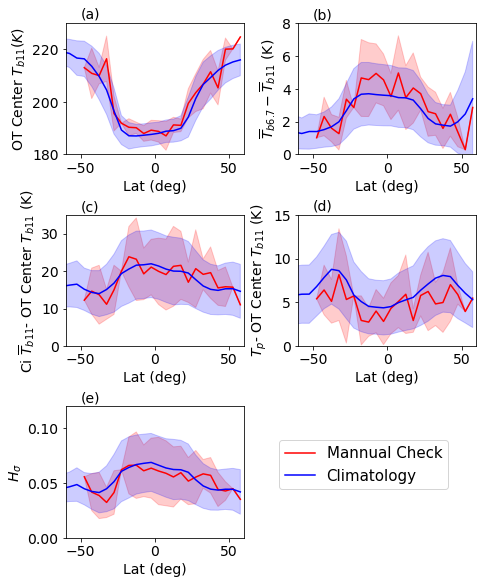

In [8]:
print(All_aveCiBT_OT.shape,Alllat_LOT.shape,Alllat_NOT.shape)
# segrated into latbins with resolution of 5 degree
fonts=14
Nlat=36
res =5.0
lat=np.arange(Nlat)*res-90+res/2.0
#print(lat)
true_bt11_avg=np.zeros((Nlat),'f')
true_bt11_std=np.zeros((Nlat),'f')
clim_bt11_avg=np.zeros((Nlat),'f')
clim_bt11_std=np.zeros((Nlat),'f')

true_btd_avg=np.zeros((Nlat),'f')
true_btd_std=np.zeros((Nlat),'f')
clim_btd_avg=np.zeros((Nlat),'f')
clim_btd_std=np.zeros((Nlat),'f')

true_btci_avg=np.zeros((Nlat),'f')
true_btci_std=np.zeros((Nlat),'f')
clim_btci_avg=np.zeros((Nlat),'f')
clim_btci_std=np.zeros((Nlat),'f')

true_bttp_avg=np.zeros((Nlat),'f')
true_bttp_std=np.zeros((Nlat),'f')
clim_bttp_avg=np.zeros((Nlat),'f')
clim_bttp_std=np.zeros((Nlat),'f')

true_hete_avg=np.zeros((Nlat),'f')
true_hete_std=np.zeros((Nlat),'f')
clim_hete_avg=np.zeros((Nlat),'f')
clim_hete_std=np.zeros((Nlat),'f')
#Alllat_OTLOT=np.append(Alllat_OT,Alllat_LOT)
#All_minBT11_OTLOT=np.append(All_minBT11_OT,All_minBT11_LOT)

true_btd= All_aveBT67_OT-All_aveBT11_OT
clim_btd= allcave_bt67-allcave_bt11
true_btci= All_aveCiBT_OT-All_minBT11_OT
clim_btci= allcave_cibt11-allcmin_bt11
true_bttp= All_trop_T_OT-All_minBT11_OT
clim_bttp= allctrop_T-allcmin_bt11

for ni in range(Nlat-1):
    #for center bt11
    ind=np.where((Alllat_OT >= lat[ni]) & (Alllat_OT < lat[ni+1]))[0]
    true_bt11_avg[ni]=np.mean(All_minBT11_OT[ind])
    true_btd_avg[ni] =np.mean(true_btd[ind])
    true_btci_avg[ni]=np.mean(true_btci[ind])
    true_bttp_avg[ni]=np.mean(true_bttp[ind])
    true_hete_avg[ni]=np.mean(All_hetero_OT[ind])
    if (len(ind) > 5):
        true_bt11_std[ni]=np.std(All_minBT11_OT[ind])
        true_btd_std[ni] =np.std(true_btd[ind])
        true_btci_std[ni]=np.std(true_btci[ind])
        true_bttp_std[ni]=np.std(true_bttp[ind])
        true_hete_std[ni]=np.std(All_hetero_OT[ind])
      
    cind=np.where((allcOT_lat >= lat[ni]) & (allcOT_lat < lat[ni+1]) & (allcmin_bt11 > 120) &(allctrop_T < 300))[0]
    clim_bt11_avg[ni]=np.mean(allcmin_bt11[cind])
    clim_btd_avg[ni] =np.mean(clim_btd[cind])
    clim_btci_avg[ni]=np.mean(clim_btci[cind])
    clim_bttp_avg[ni]=np.mean(clim_bttp[cind])
    clim_hete_avg[ni]=np.mean(allchetero[cind])
    if (len(cind) > 5):
        clim_bt11_std[ni]=np.std(allcmin_bt11[cind])
        clim_btd_std[ni] =np.std(clim_btd[cind])
        clim_btci_std[ni]=np.std(clim_btci[cind])
        clim_bttp_std[ni]=np.std(clim_bttp[cind])
        clim_hete_std[ni]=np.std(allchetero[cind])
       # plt.plot(clim_bttp[cind])
       # plt.show()
          
#plt.fill_between(x, (y-ci), (y+ci), color='blue', alpha=0.1) 

fig, ax =plt.subplots(3,2,figsize=[6.6,8],constrained_layout=True)
p00=ax[0,0].plot(lat,true_bt11_avg,color='r')
p01=ax[0,0].fill_between(lat,(true_bt11_avg-true_bt11_std),(true_bt11_avg+true_bt11_std),color='red',alpha=0.2)
ax[0,0].set_ylim([180,230])
ax[0,0].set_xlim([-60,60])
ax[0,0].set_ylabel('OT Center $T_{b11} (K)$',size=fonts)
ax[0,0].set_xlabel('Lat (deg)',size=fonts)
ax[0,0].text(-50,232,'(a)',fontsize=fonts)
ax[0,0].tick_params(labelsize=fonts)
p02=ax[0,0].plot(lat,clim_bt11_avg,color='b')
p03=ax[0,0].fill_between(lat,(clim_bt11_avg-clim_bt11_std),(clim_bt11_avg+clim_bt11_std),color='b',alpha=0.2)

p11=ax[0,1].plot(lat,true_btd_avg,color='r')
p11=ax[0,1].fill_between(lat,(true_btd_avg-true_btd_std),(true_btd_avg+true_btd_std),color='red',alpha=0.2)
ax[0,1].set_ylim([0,8])
ax[0,1].set_xlim([-60,60])
ax[0,1].set_ylabel('$\overline{T}_{b6.7}-\overline{T}_{b11}$ (K)',size=fonts)
ax[0,1].set_xlabel('Lat (deg)',size=fonts)
ax[0,1].text(-50,8.25,'(b)',fontsize=fonts)
ax[0,1].tick_params(labelsize=fonts)
p12=ax[0,1].plot(lat,clim_btd_avg,color='b')
p13=ax[0,1].fill_between(lat,(clim_btd_avg-clim_btd_std),(clim_btd_avg+clim_btd_std),color='b',alpha=0.2)

p20=ax[1,0].plot(lat,true_btci_avg,color='r')
p21=ax[1,0].fill_between(lat,(true_btci_avg-true_btci_std),(true_btci_avg+true_btci_std),color='red',alpha=0.2)
ax[1,0].set_ylim([0,35])
ax[1,0].set_xlim([-60,60])
ax[1,0].set_ylabel('Ci $\overline{T}_{b11}$- OT Center $T_{b11}$ (K)',size=fonts)
ax[1,0].set_xlabel('Lat (deg)',size=fonts)
ax[1,0].text(-50,36,'(c)',fontsize=fonts)
ax[1,0].tick_params(labelsize=fonts)
p22=ax[1,0].plot(lat,clim_btci_avg,color='b')
p23=ax[1,0].fill_between(lat,(clim_btci_avg-clim_btci_std),(clim_btci_avg+clim_btci_std),color='b',alpha=0.2)

p30=ax[1,1].plot(lat,true_bttp_avg,color='r')
p31=ax[1,1].fill_between(lat,(true_bttp_avg-true_bttp_std),(true_bttp_avg+true_bttp_std),color='red',alpha=0.2)
ax[1,1].set_ylim([0,15])
ax[1,1].set_xlim([-60,60])
ax[1,1].set_ylabel('$T_p$- OT Center $T_{b11}$ (K)',size=fonts)
ax[1,1].set_xlabel('Lat (deg)',size=fonts)
ax[1,1].text(-50,15.5,'(d)',fontsize=fonts)
ax[1,1].tick_params(labelsize=fonts)
p32=ax[1,1].plot(lat,clim_bttp_avg,color='b')
p33=ax[1,1].fill_between(lat,(clim_bttp_avg-clim_bttp_std),(clim_bttp_avg+clim_bttp_std),color='b',alpha=0.2)

p40=ax[2,0].plot(lat,true_hete_avg,color='r',label='Mannual Check')
p41=ax[2,0].fill_between(lat,(true_hete_avg-true_hete_std),(true_hete_avg+true_hete_std),color='red',alpha=0.2)
ax[2,0].set_ylim([0,0.12])
ax[2,0].set_xlim([-60,60])
ax[2,0].set_ylabel('$H_\sigma$',size=fonts)
ax[2,0].set_xlabel('Lat (deg)',size=fonts)
ax[2,0].text(-50,0.124,'(e)',fontsize=fonts)
ax[2,0].tick_params(labelsize=fonts)
p42=ax[2,0].plot(lat,clim_hete_avg,color='b',label='Climatology')
p43=ax[2,0].fill_between(lat,(clim_hete_avg-clim_hete_std),(clim_hete_avg+clim_hete_std),color='b',alpha=0.2)
# calculate the mean and std from OT_properties
#fig.subplots_adjust(bottom=0.26, top=0.9, left=0.01, right=0.95,
#                    wspace=0.25, hspace=0.35)
#p00.legend(['OT','LOT','NOT'],loc=2,fontsize=15)
ld=fig.legend(loc=5,bbox_to_anchor=(0.95,0.2),fontsize=15)

fig.delaxes(ax[2,1])
fig.savefig('OT_property_climatology_check.jpg',dpi=300)

In [16]:
# calculate how many center Tb warmer than 215
#ind=np.where(clim_btd_avg > 0)[0]
NT=len(clim_btd)
ind=np.where(clim_btd < 2)[0]
NT1=len(ind)
print('all small btd fraction',float(NT1)/float(NT), NT)

ind=np.where((abs(allcOT_lat) < 25))[0]
NT4=len(ind)
ind=np.where((clim_btd <2) & (abs(allcOT_lat) < 25))[0]
NT5=len(ind)
print('tropical small btd fraction',float(NT5)/float(NT4))

ind=np.where((abs(allcOT_lat) > 25))[0]
NT2=len(ind)
ind=np.where((clim_btd <2) & (abs(allcOT_lat) > 25))[0]
NT3=len(ind)
print('midlatitude small btd fraction',float(NT3)/float(NT2), NT2)

print('small btd midlatitude fraction',float(NT3)/float(NT1))


all small btd fraction 0.3149433621327987 1233009
tropical small btd fraction 0.20303486231490647
midlatitude small btd fraction 0.6006402757046779 347038
small btd midlatitude fraction 0.5367756123689252


(1233009,) [False False False False  True  True]
hetero vs minbt, ocean land (0.18566361127316872, 0.0) (0.17588991099380022, 0.0)
ota vs minbt, ocean land (0.03372179758650541, 1.9600889704048664e-81) (0.04477365258231097, 2.8776104205076993e-53)
ota vs hetero, ocean land (0.1860080899073766, 0.0) (0.17069215541630114, 0.0)


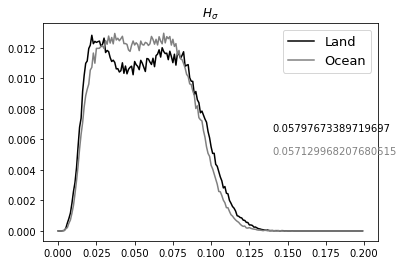

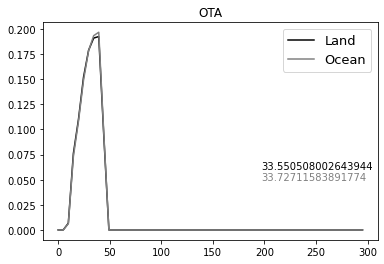

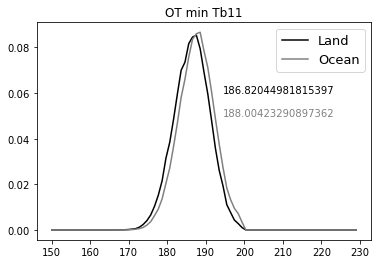

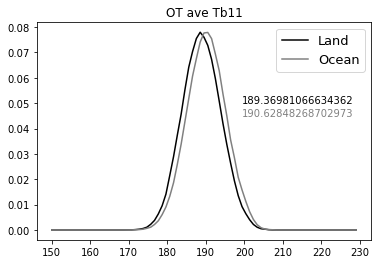

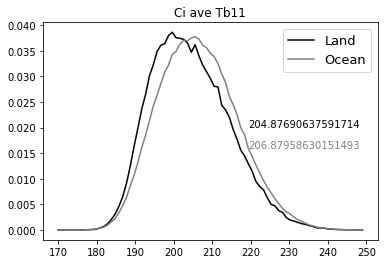

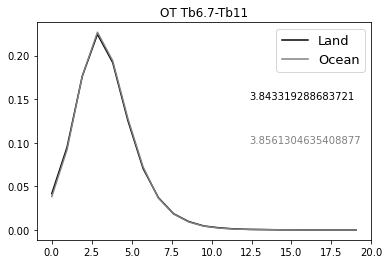

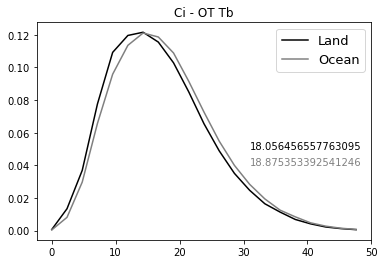

In [25]:
# get land sea mask
# study tropical region 
from scipy.stats.stats import pearsonr   
fontsz=13
ocean_color='gray'
land_color ='black'

land_mask=globe.is_land(allcOT_lat,allcOT_lon)
print(land_mask.shape,land_mask[0:6])

otci_diff = allcave_cibt11 - allcmin_bt11
landind=np.where((abs(allcOT_lat) < 25) & (land_mask) & (allcmin_bt11 > 0) & (allota < 50))[0] # & (allcave_cibt11 > 190) & (allcave_cibt11 < 300))[0]

ocean_mask=globe.is_ocean(allcOT_lat,allcOT_lon)
oceanind=np.where((abs(allcOT_lat) < 25) & (ocean_mask) & (allcmin_bt11 > 0) & (allota < 50))[0] # & (allcave_cibt11 > 190) & (allcave_cibt11 < 300))[0]
                                        
land_hetero=allchetero[landind]
land_ota   =allota[landind]
land_minbt =allcmin_bt11[landind]

ocean_hetero=allchetero[oceanind]
ocean_ota   =allota[oceanind]
ocean_minbt =allcmin_bt11[oceanind]

btd_diff = allcave_bt67-allcave_bt11
land_btddiff=btd_diff[landind]
ocean_btddiff=btd_diff[oceanind]


land_otci_diff = otci_diff[landind]
ocean_otci_diff= otci_diff[oceanind]

land_otave_bt11 = allcave_bt11[landind]
ocean_otave_bt11= allcave_bt11[oceanind]

land_cibt11 = allcave_cibt11[landind]
ocean_cibt11= allcave_cibt11[oceanind]
print('hetero vs minbt, ocean land',pearsonr(ocean_hetero,ocean_minbt),pearsonr(land_hetero,land_minbt))
print('ota vs minbt, ocean land',pearsonr(ocean_ota,ocean_minbt),pearsonr(land_ota,land_minbt))
print('ota vs hetero, ocean land',pearsonr(ocean_ota,ocean_hetero),pearsonr(land_ota,land_hetero))

landhis=np.histogram(land_hetero,bins=200,range=(0,0.2))
x=landhis[1]
plt.plot(x[0:len(x)-1],landhis[0]/np.sum(landhis[0]),land_color,label='Land')

oceanhis=np.histogram(ocean_hetero,bins=200,range=(0,0.2))
x=oceanhis[1]
plt.plot(x[0:len(x)-1],oceanhis[0]/np.sum(oceanhis[0]),ocean_color,label='Ocean')
plt.title('$H_\sigma$')
ld=plt.legend(fontsize=fontsz)
plt.text(x[140],0.0065,str(np.mean(land_hetero)),color=land_color)
plt.text(x[140],0.005,str(np.mean(ocean_hetero)),color=ocean_color)
plt.show()

landhis=np.histogram(land_ota,bins=61,range=(0,300))
x=landhis[1]
plt.plot(x[0:len(x)-1],landhis[0]/np.sum(landhis[0]),land_color,label='Land')
#print(pearsonr(midlat_hetero[midind], midlat_ota[midind]))

oceanhis=np.histogram(ocean_ota,bins=61,range=(0,300))
x=oceanhis[1]
plt.plot(x[0:len(x)-1],oceanhis[0]/np.sum(oceanhis[0]),ocean_color,label='Ocean')
plt.title('OTA')
ld=plt.legend(fontsize=fontsz)
plt.text(x[40],0.06,str(np.mean(land_ota)),color=land_color)
plt.text(x[40],0.05,str(np.mean(ocean_ota)),color=ocean_color)
plt.show()

landhis=np.histogram(land_minbt,bins=81,range=(150,230))
x=landhis[1]
plt.plot(x[0:len(x)-1],landhis[0]/np.sum(landhis[0]),land_color,label='Land')
#print(pearsonr(midlat_hetero[midind], midlat_ota[midind]))

oceanhis=np.histogram(ocean_minbt,bins=81,range=(150,230))
x=oceanhis[1]
plt.plot(x[0:len(x)-1],oceanhis[0]/np.sum(oceanhis[0]),ocean_color,label='Ocean')
plt.title('OT min Tb11')
ld=plt.legend(fontsize=fontsz)
plt.text(x[45],0.06,str(np.nanmean(land_minbt)),color=land_color)
plt.text(x[45],0.05,str(np.nanmean(ocean_minbt)),color=ocean_color)
plt.show()

landhis=np.histogram(land_otave_bt11,bins=81,range=(150,230))
x=landhis[1]
plt.plot(x[0:len(x)-1],landhis[0]/np.sum(landhis[0]),land_color,label='Land')
#print(pearsonr(midlat_hetero[midind], midlat_ota[midind]))

oceanhis=np.histogram(ocean_otave_bt11,bins=81,range=(150,230))
x=oceanhis[1]
plt.plot(x[0:len(x)-1],oceanhis[0]/np.sum(oceanhis[0]),ocean_color,label='Ocean')
plt.title('OT ave Tb11')
ld=plt.legend(fontsize=fontsz)
plt.text(x[50],0.05,str(np.mean(land_otave_bt11)),color=land_color)
plt.text(x[50],0.045,str(np.mean(ocean_otave_bt11)),color=ocean_color)
plt.show()

landhis=np.histogram(land_cibt11,bins=81,range=(170,250))
x=landhis[1]
plt.plot(x[0:len(x)-1],landhis[0]/np.sum(landhis[0]),land_color,label='Land')
#print(pearsonr(midlat_hetero[midind], midlat_ota[midind]))

oceanhis=np.histogram(ocean_cibt11,bins=81,range=(170,250))
x=oceanhis[1]
plt.plot(x[0:len(x)-1],oceanhis[0]/np.sum(oceanhis[0]),ocean_color,label='Ocean')
plt.title('Ci ave Tb11')
plt.text(x[50],0.02,str(np.mean(land_cibt11)),color=land_color)
plt.text(x[50],0.016,str(np.mean(ocean_cibt11)),color=ocean_color)
ld=plt.legend(fontsize=fontsz)
plt.show()

landhis=np.histogram(land_btddiff,bins=21,range=(0,20))
x=landhis[1]
plt.plot(x[0:len(x)-1],landhis[0]/np.sum(landhis[0]),land_color,label='Land')
#print(pearsonr(midlat_hetero[midind], midlat_ota[midind]))

oceanhis=np.histogram(ocean_btddiff,bins=21,range=(0,20))
x=oceanhis[1]
plt.plot(x[0:len(x)-1],oceanhis[0]/np.sum(oceanhis[0]),ocean_color,label='Ocean')
plt.title('OT Tb6.7-Tb11')
ld=plt.legend(fontsize=fontsz)
plt.text(x[13],0.15,str(np.nanmean(land_btddiff)),color=land_color)
plt.text(x[13],0.10,str(np.nanmean(ocean_btddiff)),color=ocean_color)
plt.show()

landhis=np.histogram(land_otci_diff,bins=21,range=(0,50))
x=landhis[1]
plt.plot(x[0:len(x)-1],landhis[0]/np.sum(landhis[0]),land_color,label='Land')
#print(pearsonr(midlat_hetero[midind], midlat_ota[midind]))

oceanhis=np.histogram(ocean_otci_diff,bins=21,range=(0,50))
x=oceanhis[1]
plt.plot(x[0:len(x)-1],oceanhis[0]/np.sum(oceanhis[0]),ocean_color,label='Ocean')
plt.title('Ci - OT Tb')
ld=plt.legend(fontsize=fontsz)
plt.text(x[13],0.05,str(np.nanmean(land_otci_diff)),color=land_color)
plt.text(x[13],0.04,str(np.nanmean(ocean_otci_diff)),color=ocean_color)
plt.show()

(340766,) (1233009,)


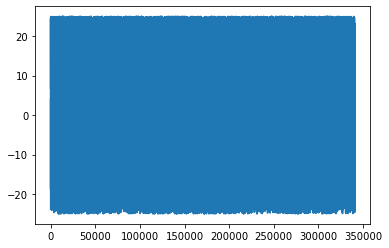

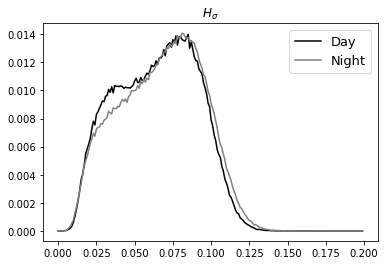

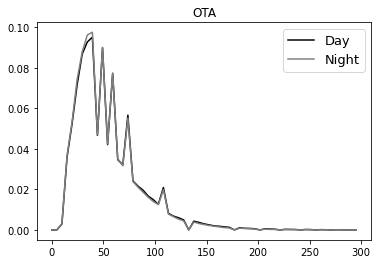

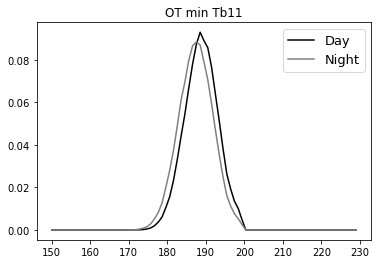

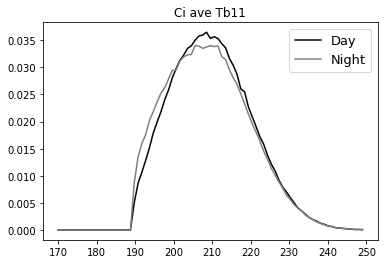

In [23]:
# get day-night difference
dayind=np.where((alldnflag == 0) & (allcmin_bt11 > 0) & (abs(allcOT_lat) < 25) & (allcave_cibt11 > 190) & (allcave_cibt11 < 300))[0]
nightind=np.where((alldnflag == 1) & (allcmin_bt11 > 0) & (abs(allcOT_lat) < 25) & (allcave_cibt11 > 190) & (allcave_cibt11 < 300))[0]
day_hetero=allchetero[dayind]
day_ota   =allota[dayind]
day_minbt =allcmin_bt11[dayind]
print(dayind.shape,alldnflag.shape)
plt.plot(allcOT_lat[dayind])
plt.show()
btd_diff = allcave_bt67-allcave_bt11
day_btddiff=btd_diff[dayind]
day_otci_diff = otci_diff[dayind]
day_otave_bt11 = allcave_bt11[dayind]
day_cibt11 = allcave_cibt11[dayind]

night_hetero=allchetero[nightind]
night_ota   =allota[nightind]
night_minbt =allcmin_bt11[nightind]

night_btddiff=btd_diff[nightind]
night_otci_diff = otci_diff[nightind]
night_otave_bt11 = allcave_bt11[nightind]
night_cibt11 = allcave_cibt11[nightind]

#=== to plot
dayhis=np.histogram(day_hetero,bins=200,range=(0,0.2))
x=dayhis[1]
plt.plot(x[0:len(x)-1],dayhis[0]/np.sum(dayhis[0]),land_color,label='Day')

nighthis=np.histogram(night_hetero,bins=200,range=(0,0.2))
plt.plot(x[0:len(x)-1],nighthis[0]/np.sum(nighthis[0]),ocean_color,label='Night')
plt.title('$H_\sigma$')
ld=plt.legend(fontsize=fontsz)
plt.show()

landhis=np.histogram(day_ota,bins=61,range=(0,300))
x=landhis[1]
plt.plot(x[0:len(x)-1],landhis[0]/np.sum(landhis[0]),land_color,label='Day')
#print(pearsonr(midlat_hetero[midind], midlat_ota[midind]))

oceanhis=np.histogram(night_ota,bins=61,range=(0,300))
x=oceanhis[1]
plt.plot(x[0:len(x)-1],oceanhis[0]/np.sum(oceanhis[0]),ocean_color,label='Night')
plt.title('OTA')
ld=plt.legend(fontsize=fontsz)
plt.show()

landhis=np.histogram(day_minbt,bins=81,range=(150,230))
x=landhis[1]
plt.plot(x[0:len(x)-1],landhis[0]/np.sum(landhis[0]),land_color,label='Day')
#print(pearsonr(midlat_hetero[midind], midlat_ota[midind]))

oceanhis=np.histogram(night_minbt,bins=81,range=(150,230))
x=oceanhis[1]
plt.plot(x[0:len(x)-1],oceanhis[0]/np.sum(oceanhis[0]),ocean_color,label='Night')
plt.title('OT min Tb11')
ld=plt.legend(fontsize=fontsz)
plt.show()

landhis=np.histogram(day_cibt11,bins=81,range=(170,250))
x=landhis[1]
plt.plot(x[0:len(x)-1],landhis[0]/np.sum(landhis[0]),land_color,label='Day')
#print(pearsonr(midlat_hetero[midind], midlat_ota[midind]))

oceanhis=np.histogram(night_cibt11,bins=81,range=(170,250))
x=oceanhis[1]
plt.plot(x[0:len(x)-1],oceanhis[0]/np.sum(oceanhis[0]),ocean_color,label='Night')
plt.title('Ci ave Tb11')
ld=plt.legend(fontsize=fontsz)
plt.show()

In [23]:
ind=np.where(allcmin_bt11 > 0)[0]
NT=len(ind)
ind=np.where(allcmin_bt11 > 215)[0]
NT1=len(ind)
print('all warm OT fraction',float(NT1)/float(NT), NT)

ind=np.where((allcmin_bt11 > 0) & (abs(allcOT_lat) > 30))[0]
NT2=len(ind)
ind=np.where((allcmin_bt11 > 215) & (abs(allcOT_lat) > 30))[0]
NT3=len(ind)
print('midlatitude warm OT fraction',float(NT3)/float(NT2), NT2)

print('warm OT midlatitude fraction',float(NT3)/float(NT1))

all warm OT fraction 0.08062204992185892 1831943
midlatitude warm OT fraction 0.35778788609019474 402529
warm OT midlatitude fraction 0.9751176410846677


In [7]:
# to plot geospatial distributions of OTs and OT BT11, Heterogeneity etc 5x5 degree
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

nlatres=5
nlonres=5
nxdim=int(360/nlonres)
nydim=int(180/nlatres)
fontsz=16

All_OT_num=np.zeros((nxdim,nydim),'f')
All_parameter = np.zeros((nxdim,nydim),'f')

lon=np.arange(nxdim)*nlonres-180+nlonres/2.0
lat=np.arange(nydim)*nlatres-90+nlatres/2.0

ind=np.where(np.nanmin(allcmin_bt11) == allcmin_bt11)[0]
print('min bt, lon, lat',np.nanmin(allcmin_bt11),allcOT_lon[ind],allcOT_lat[ind])

for yi in range(nydim-1):
    for xi in range(nxdim-1):
        ind=np.where((allcOT_lon > lon[xi]) & (allcOT_lon <= lon[xi+1]) & \
                     (allcOT_lat > lat[yi]) & (allcOT_lat <= lat[yi+1]))[0]
        All_OT_num[xi,yi]=All_OT_num[xi,yi]+len(ind)
        All_parameter[xi,yi]=All_parameter[xi,yi]+np.sum(allcmin_bt11[ind])


min bt, lon, lat 166.21619 [172.66559] [-6.6626716]


[166.74290674 166.36079969 166.55249295 166.74290674 165.63019283
 166.60021555 166.79031266 166.79031266 166.93206137 166.88488967] [172.5482   169.80779   21.343489 138.74664  172.65306   22.285639
 138.70677  129.74802   24.925941 118.448746] [ -7.3485613   -0.9978563   -0.73661226 -17.115717    -6.660884
  -6.153128   -15.784698   -14.637278     5.63134    -14.933489  ] [ 5  2  3  6  1  4  7  8 10  9] [2018365.1415 2018365.141  2015082.003  2018332.042  2018365.1415
 2020053.2355 2012080.1625 2003020.05   2008123.114  2016359.06  ]


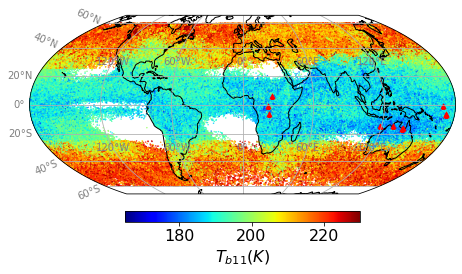

In [4]:
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
# search for the 10 minimum Tb
fontsz=16
ind=np.where(allcmin_ctbt11 < 150)[0]
allcmin_ctbt11[ind]=np.nan
allcmin_bt11_sort=np.argpartition(allcmin_ctbt11,10)[:10]
Ten_min_tb=allcmin_ctbt11[allcmin_bt11_sort]
Ten_min_lon=allcOT_ctlon[allcmin_bt11_sort]
Ten_min_lat=allcOT_ctlat[allcmin_bt11_sort]
rank_tb=Ten_min_tb.argsort().argsort()+1
print(Ten_min_tb,Ten_min_lon,Ten_min_lat,rank_tb,alltime[allcmin_bt11_sort])
fig,axs =plt.subplots(1,figsize=([6,5]),subplot_kw={'projection': ccrs.Mollweide()},constrained_layout=True)
img_extent=(-180,180,-90,90)
p0=axs.scatter(allcOT_lon,allcOT_lat,c=allcmin_bt11,marker='.',s=0.8,vmin=165,vmax=230,\
               transform=ccrs.PlateCarree(),cmap='jet')
axs.coastlines(resolution='110m', color='black', linewidth=1)
#axs.set_title('',fontsize=15)
#axs.text(-160,95,'',fontsize=15)
gl=axs.gridlines(draw_labels=True)
gl.xlabel_style={'size':10,'color':'gray'}
gl.ylabel_style={'size':10,'color':'gray'}
gl.xlabels_top = False
gl.ylabels_right = False     
#gl.xlabels_left = False
#gl.ylabels_bottom = False     
cb2=plt.colorbar(p0,ax=axs,orientation='horizontal',shrink=0.55,pad=0.05)
cb2.ax.tick_params(labelsize=fontsz)
cb2.set_label(label='$T_{b11} (K)$',size=fontsz)
p1=axs.scatter(Ten_min_lon, Ten_min_lat,c=['r'],marker='^', s=24,transform=ccrs.PlateCarree())
#for i in np.arange(10):
    #if i == 4:
    #    Ten_min_lon[i]=Ten_min_lon[i]-0.6
    #if i == 3:
    #    Ten_min_lat[i]=Ten_min_lat[i]-0.6
        
#    axs.text(Ten_min_lon[i],Ten_min_lat[i],str(rank_tb[i]),color='white',fontsize=13,transform=ccrs.PlateCarree())

/data/keeling/a/yulanh/anaconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/data/keeling/a/yulanh/anaconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


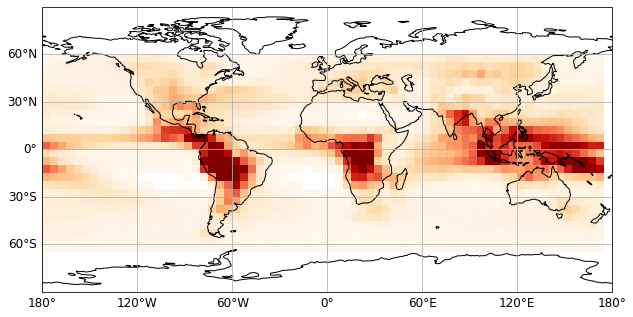

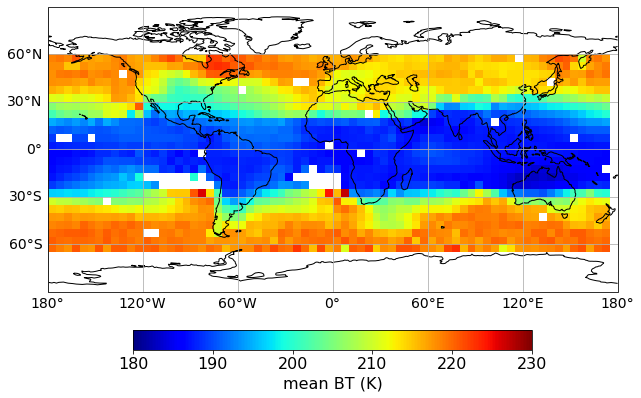

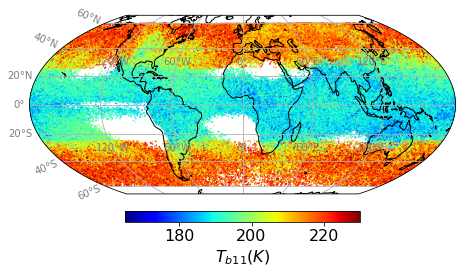

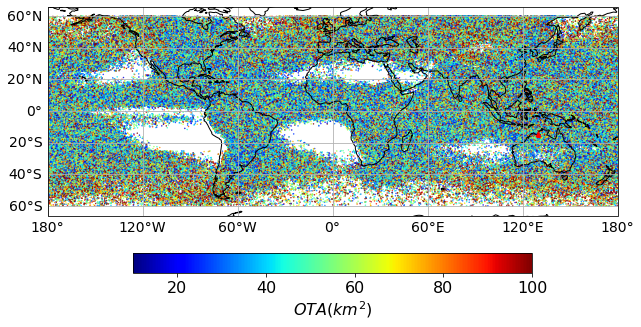

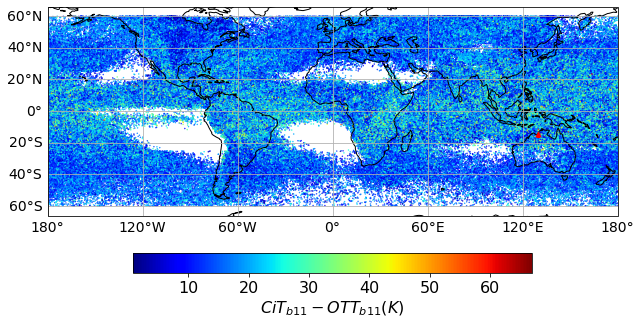

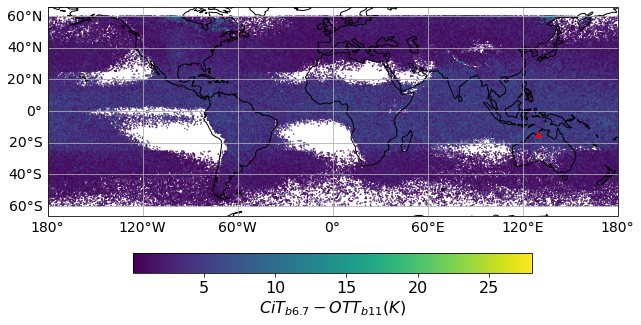

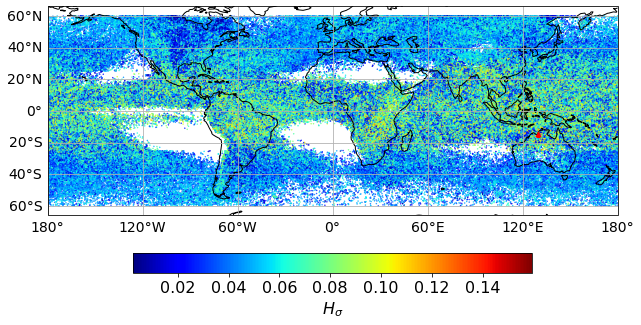

In [9]:
fig,axs =plt.subplots(1,figsize=([8,7]),subplot_kw={'projection': ccrs.PlateCarree()},constrained_layout=True)
img_extent=(-180,180,-90,90)
All_OT_num[All_OT_num == 0] = 'nan'

p0=axs.imshow(np.flip(All_OT_num.T,axis=0),extent=img_extent,transform=ccrs.PlateCarree(),vmin=0,vmax=6000,cmap='OrRd')
axs.coastlines(resolution='110m', color='black', linewidth=1)
axs.set_title('',fontsize=15)
axs.text(-160,95,'',fontsize=14)
gl=axs.gridlines(draw_labels=True)
gl.xlabel_style={'size':12,'color':'black'}
gl.ylabel_style={'size':12,'color':'black'}
gl.xlabels_top = False
gl.ylabels_right = False   

fig,axs =plt.subplots(1,figsize=([8,7]),subplot_kw={'projection': ccrs.PlateCarree()},constrained_layout=True)
img_extent=(-180,180,-90,90)
All_OT_num[All_OT_num == 0] = 'nan'
ave_para=All_parameter/All_OT_num

p0=axs.imshow(np.flip(ave_para.T,axis=0),extent=img_extent,transform=ccrs.PlateCarree(),vmin=180,vmax=230,cmap='jet')
axs.coastlines(resolution='110m', color='black', linewidth=1)
axs.set_title('',fontsize=15)
axs.text(-160,95,'',fontsize=15)
gl=axs.gridlines(draw_labels=True)
gl.xlabel_style={'size':14,'color':'black'}
gl.ylabel_style={'size':14,'color':'black'}
gl.xlabels_top = False
gl.ylabels_right = False     
cb2=plt.colorbar(p0,ax=axs,orientation='horizontal',shrink=0.7,pad=0.08)
cb2.ax.tick_params(labelsize=fontsz)
cb2.set_label(label='mean BT (K)',size=fontsz)

# get high heterogeneity
ind=np.where(allota < 150)[0]
allchetero_temp=allchetero[ind]
allcmin_bt11_temp=allcmin_bt11[ind]
allota_temp = allota[ind]
allcave_cibt11_temp =allcave_cibt11[ind]
allcmin_bt11_temp = allcmin_bt11[ind]
allcave_bt67_temp = allcave_bt67[ind]
allcave_bt11_temp = allcave_bt11[ind]
allcOT_lon_temp = allcOT_lon[ind]
allcOT_lat_temp = allcOT_lat[ind]

fig,axs =plt.subplots(1,figsize=([6,5]),subplot_kw={'projection': ccrs.Mollweide()},constrained_layout=True)
img_extent=(-180,180,-90,90)
p0=axs.scatter(allcOT_lon_temp,allcOT_lat_temp,c=allcmin_bt11_temp,marker='.',s=0.8,vmin=165,vmax=230,\
               transform=ccrs.PlateCarree(),cmap='jet')
axs.coastlines(resolution='110m', color='black', linewidth=1)
#axs.set_title('',fontsize=15)
#axs.text(-160,95,'',fontsize=15)
gl=axs.gridlines(draw_labels=True)
gl.xlabel_style={'size':10,'color':'gray'}
gl.ylabel_style={'size':10,'color':'gray'}
gl.xlabels_top = False
gl.ylabels_right = False     
#gl.xlabels_left = False
#gl.ylabels_bottom = False     
cb2=plt.colorbar(p0,ax=axs,orientation='horizontal',shrink=0.55,pad=0.05)
cb2.ax.tick_params(labelsize=fontsz)
cb2.set_label(label='$T_{b11} (K)$',size=fontsz)
#p1=axs.scatter([129.75778], [-14.536466],c=['r'],marker='^', s=24,transform=ccrs.PlateCarree())
#p1=axs.scatter([172.66559], [-6.6626716],c=['r'],marker='^', s=24,transform=ccrs.PlateCarree())

fig,axs =plt.subplots(1,figsize=([8,7]),subplot_kw={'projection': ccrs.PlateCarree()},constrained_layout=True)
img_extent=(-180,180,-90,90)
p0=axs.scatter(allcOT_lon_temp,allcOT_lat_temp,c=allota_temp,marker='.',s=0.8,vmin=10,vmax=100,\
               transform=ccrs.PlateCarree(),cmap='jet')
axs.coastlines(resolution='110m', color='black', linewidth=1)
axs.set_title('',fontsize=15)
axs.text(-160,95,'',fontsize=15)
gl=axs.gridlines(draw_labels=True)
gl.xlabel_style={'size':14,'color':'black'}
gl.ylabel_style={'size':14,'color':'black'}
gl.xlabels_top = False
gl.ylabels_right = False     
cb2=plt.colorbar(p0,ax=axs,orientation='horizontal',shrink=0.7,pad=0.08)
cb2.ax.tick_params(labelsize=fontsz)
cb2.set_label(label='$OTA (km^2)$',size=fontsz)
p1=axs.scatter([129.75778], [-14.536466],c=['r'],marker='^', s=24,transform=ccrs.PlateCarree())


fig,axs =plt.subplots(1,figsize=([8,7]),subplot_kw={'projection': ccrs.PlateCarree()},constrained_layout=True)
img_extent=(-180,180,-90,90)

p0=axs.scatter(allcOT_lon_temp,allcOT_lat_temp,c=(allcave_cibt11_temp-allcmin_bt11_temp),marker='.',s=0.8,transform=ccrs.PlateCarree(),cmap='jet')
axs.coastlines(resolution='110m', color='black', linewidth=1)
axs.set_title('',fontsize=15)
axs.text(-160,95,'',fontsize=15)
gl=axs.gridlines(draw_labels=True)
gl.xlabel_style={'size':14,'color':'black'}
gl.ylabel_style={'size':14,'color':'black'}
gl.xlabels_top = False
gl.ylabels_right = False     
cb2=plt.colorbar(p0,ax=axs,orientation='horizontal',shrink=0.7,pad=0.08)
cb2.ax.tick_params(labelsize=fontsz)
cb2.set_label(label='$Ci T_{b11} - OT T_{b11} (K)$',size=fontsz)
p1=axs.scatter([129.75778], [-14.536466],c=['r'],marker='^', s=24,transform=ccrs.PlateCarree())

fig,axs =plt.subplots(1,figsize=([8,7]),subplot_kw={'projection': ccrs.PlateCarree()},constrained_layout=True)
img_extent=(-180,180,-90,90)

p0=axs.scatter(allcOT_lon_temp,allcOT_lat_temp,c=(allcave_bt67_temp-allcave_bt11_temp),marker='.',s=0.8,\
               transform=ccrs.PlateCarree())
axs.coastlines(resolution='110m', color='black', linewidth=1)
axs.set_title('',fontsize=15)
axs.text(-160,95,'',fontsize=15)
gl=axs.gridlines(draw_labels=True)
gl.xlabel_style={'size':14,'color':'black'}
gl.ylabel_style={'size':14,'color':'black'}
gl.xlabels_top = False
gl.ylabels_right = False     
cb2=plt.colorbar(p0,ax=axs,orientation='horizontal',shrink=0.7,pad=0.08)
cb2.ax.tick_params(labelsize=fontsz)
cb2.set_label(label='$Ci T_{b6.7} - OT T_{b11} (K)$',size=fontsz)
p1=axs.scatter([129.75778], [-14.536466],c=['r'],marker='^', s=24,transform=ccrs.PlateCarree())

fig,axs =plt.subplots(1,figsize=([8,7]),subplot_kw={'projection': ccrs.PlateCarree()},constrained_layout=True)
img_extent=(-180,180,-90,90)

p0=axs.scatter(allcOT_lon_temp,allcOT_lat_temp,c=allchetero_temp,marker='.',s=0.8,transform=ccrs.PlateCarree(),cmap='jet')
axs.coastlines(resolution='110m', color='black', linewidth=1)
axs.set_title('',fontsize=15)
axs.text(-160,95,'',fontsize=15)
gl=axs.gridlines(draw_labels=True)
gl.xlabel_style={'size':14,'color':'black'}
gl.ylabel_style={'size':14,'color':'black'}
gl.xlabels_top = False
gl.ylabels_right = False     
cb2=plt.colorbar(p0,ax=axs,orientation='horizontal',shrink=0.7,pad=0.08)
cb2.ax.tick_params(labelsize=fontsz)
cb2.set_label(label='$ H_{\sigma}$',size=fontsz)
p1=axs.scatter([129.75778], [-14.536466],c=['r'],marker='^', s=24,transform=ccrs.PlateCarree())

[ 78.53981   33.18307   21.647535 ... 182.65414  113.09733   60.132046]
(0.36436380538561036, 0.0)


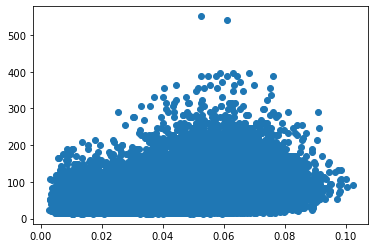

In [54]:
# calcualte the correlation between ota and minbt11. Assuming that lower bt11 correspond to stronger intense, stronger updraft. larger ota
# check the tropics
from scipy.stats.stats import pearsonr   
ind=np.where((abs(allcOT_lat) > 50) & (allchetero > 0.00) & (allcmin_bt11 > 0))[0]
allota1=allota[ind]
allbt11_1=clim_btci[ind]
allchetero1=allchetero[ind]
print(allota1)

print(pearsonr(allchetero1, allota1))
plt.plot(allchetero1,allota1,'o')
#plt.yscale('log',base=10) 
plt.show()

In [79]:
from scipy.stats.stats import pearsonr   

ind=np.where((abs(allcOT_lat) > 25) & (otci_diff)>0)[0]
midlat_hetero = allchetero[ind]
midlat_ota = allota[ind]
midlat_otci_diff=otci_diff[ind]

ind=np.where((abs(allcOT_lat) < 25) & ((otci_diff) >0))[0]
troplat_hetero = allchetero[ind]
troplat_ota = allota[ind]
troplat_otci_diff=otci_diff[ind]

midind=np.where(midlat_otci_diff > 10.0)[0]
midhis=np.histogram(midlat_hetero[midind],bins=200,range=(0,0.2))
x=midhis[1]
plt.plot(x[0:len(x)-1],midhis[0]/np.sum(midhis[0]),'r')


tropind=np.where(midlat_otci_diff  > 10.0)[0]
trophis=np.histogram(troplat_hetero[tropind],bins=200,range=(0,0.2))
x=trophis[1]
plt.plot(x[0:len(x)-1],trophis[0]/np.sum(trophis[0]),'pink')
plt.show()

midhis=np.histogram(midlat_ota[midind],bins=61,range=(0,300))
x=midhis[1]
plt.plot(x[0:len(x)-1],midhis[0]/np.sum(midhis[0]),'r')
print(pearsonr(midlat_hetero[midind], midlat_ota[midind]))


trophis=np.histogram(troplat_ota[tropind],bins=61,range=(0,300))
x=trophis[1]
plt.plot(x[0:len(x)-1],trophis[0]/np.sum(trophis[0]),'pink')
plt.show()

print(pearsonr(troplat_otci_diff[tropind], troplat_ota[tropind]))

TypeError: ufunc 'bitwise_and' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''